In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from numpy import median 
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from scipy import signal 
from scipy.ndimage import gaussian_filter1d
from scipy import interpolate
import cPickle as pickle
from lab.classes.dbclasses import dbMouse
from lab.analysis import behavior_analysis as ba
from pycircstat.descriptive import _complex_mean
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
%run Helper_Functions.ipynb

In [3]:
mouse = dbMouse('bv140')

expt = mouse.imagingExperiments()[2]
expt2 = mouse.imagingExperiments()[5]
roi_label = 'all_fissa'
n_bins = 100
        
raw_heatmap = interpHeatmap(heatmap(expt, roi_label, file = 'from_file', n_bins = 100))
raw_heatmap2 = interpHeatmap(heatmap(expt2, roi_label, file = 'from_file', n_bins = 100))

In [4]:
filepath = expt.sima_path() + '/place_fields_FISSA.pkl'
with open(filepath, 'rb') as f:
    data = pickle.load(f)
smoothed_tuning_curves = data['spatial_tuning_smooth']

In [5]:
filepath2 = expt2.sima_path() + '/place_fields_FISSA.pkl'
with open(filepath2, 'rb') as f:
    data2 = pickle.load(f)
smoothed_tuning_curves2 = data2['spatial_tuning_smooth']

In [6]:
filepath3 = expt.sima_path() + '/shuffled_tuning_curves_FISSA.pkl'
with open(filepath3, 'rb') as f:
    shuffles = pickle.load(f)
nf = shuffles['Ninety_Five_Perc_Tuning_Curves']
fp = shuffles['Five_Perc_Tuning_Curves']

In [7]:
filepath4 = expt2.sima_path() + '/shuffled_tuning_curves_FISSA.pkl'
with open(filepath4, 'rb') as f:
    shuffles2 = pickle.load(f)
nf2 = shuffles2['Ninety_Five_Perc_Tuning_Curves']
fp2 = shuffles2['Five_Perc_Tuning_Curves']

/home/bert/.local/lib/python2.7/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


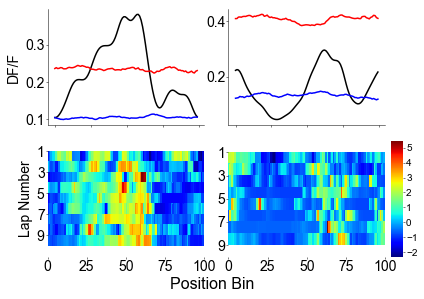

In [8]:
fig = plt.figure(figsize = (6, 4))
gs = gridspec.GridSpec(8, 20, figure = fig)

fig_ax1 = fig.add_subplot(gs[0:4,0:9])
fig_ax1.plot(smoothed_tuning_curves[4,:], color = 'black')
fig_ax1.plot(nf[4,:], color = 'red')
fig_ax1.plot(fp[4,:], color = 'blue')
fig_ax1.set_ylabel('DF/F', fontsize = 14)
fig_ax1.tick_params(axis = 'y', labelsize = 14)
fig_ax1.set_xticklabels([''])
simpleaxis(fig_ax1)

fig_ax2 = fig.add_subplot(gs[4:, 0:9])
sns.heatmap(stats.zscore(raw_heatmap[:,:,4], axis = 1), cmap = 'jet', ax = fig_ax2, \
           cbar = False, rasterized = True)
fig_ax2.set_ylabel('Lap Number', fontsize = 14)
fig_ax2.tick_params(axis = 'y', labelsize = 14)
fig_ax2.set_xticks([0,25,50,75,100])
fig_ax2.set_xticklabels([0,25,50,75,100], rotation = 0, fontsize = 14)
fig_ax2.set_yticks([1, 3, 5, 7, 9])
fig_ax2.set_yticklabels([1, 3, 5, 7, 9], rotation = 0, fontsize = 14)

fig_ax3 = fig.add_subplot(gs[0:4,10:19])
fig_ax3.plot(smoothed_tuning_curves2[5,:], color = 'black')
fig_ax3.plot(nf2[5,:], color = 'red')
fig_ax3.plot(fp2[5,:], color = 'blue')
fig_ax3.tick_params(axis = 'y', labelsize = 14)
fig_ax3.set_xticklabels([''])
simpleaxis(fig_ax3)

fig_ax4 = fig.add_subplot(gs[4:, 10:19])
fig_ax5 = fig.add_subplot(gs[4:, 19:20])
sns.heatmap(stats.zscore(raw_heatmap2[:,:,5], axis = 1), cmap = 'jet', ax = fig_ax4, \
           cbar_ax = fig_ax5, rasterized = True)
fig_ax4.tick_params(axis = 'y', labelsize = 14)
fig_ax4.set_yticks([1, 3, 5, 7, 9])
fig_ax4.set_yticklabels([1, 3, 5, 7, 9], rotation = 0, fontsize = 14)
fig_ax4.set_xticks([0,25,50,75,100])
fig_ax4.set_xticklabels([0,25,50,75,100], rotation = 0, fontsize = 14)

fig.text(0.50, 0, 'Position Bin', va = 'center', ha = 'center', fontsize = 16)

fig.tight_layout()
plt.savefig('Example_Tuning_Curves.svg', transparent = True)